In [ ]:
# %%

import torch
from PIL import Image
import numpy as np
import skdim

from n25c9600_gradio_interpolate_analogy import train_mood_space, interpolate_two_images

In [ ]:
# %%

from PIL import Image
path1 = "/workspace/aaa_images/dog.png"
path2 = "/workspace/aaa_images/fish.png"
image1 = Image.open(path1).resize((512, 512), resample=Image.Resampling.LANCZOS).convert("RGB")
image2 = Image.open(path2).resize((512, 512), resample=Image.Resampling.LANCZOS).convert("RGB")

model, trainer = train_mood_space([image1, image2], lr=0.001, steps=1000)

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name             | Type | Params
------------------------------------------
0 | compress         | MLP  | 1.3 M 
1 | uncompress       | MLP  | 1.7 M 
2 | uncompress_dummy | MLP  | 1.3 M 
------------------------------------------
4.2 M     Trainable params
0         Non-trainable params
4.2 M     Total params
16.858    Total estimated model params size (MB)


intrinsic dim is 7


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


In [ ]:
# %%

ws = np.linspace(0.0, 2.0, 10) # interpolation weight
interpolated_images = interpolate_two_images(image1, image2, model, ws, n_cluster=10, match_method='hungarian')

Using cache found in /root/.cache/torch/hub/facebookresearch_dino_main


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# %%

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

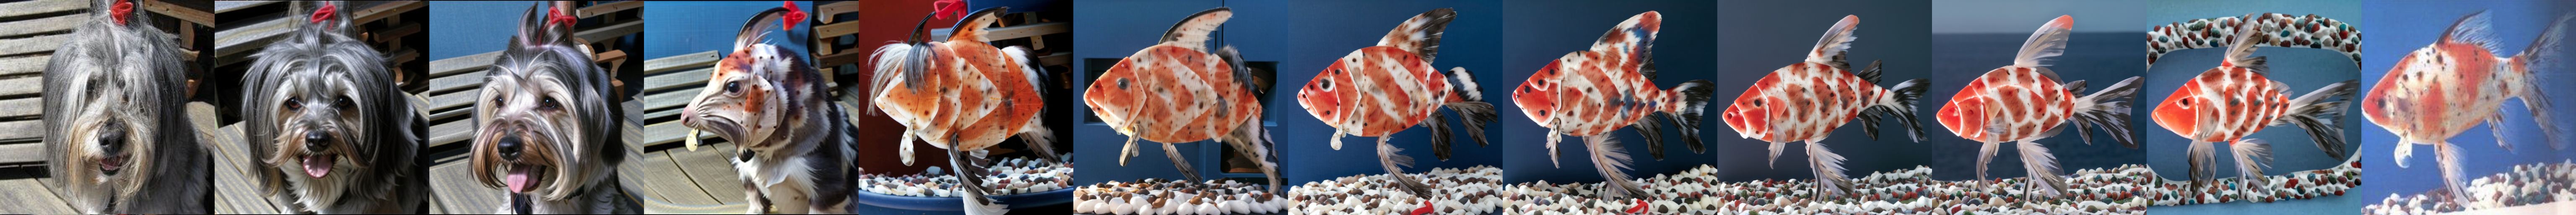

In [ ]:
#%%

all_images = [image1] + interpolated_images + [image2]
img = image_grid(all_images, 1, len(all_images))
display(img)